In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
"#RenuncieFiscal","#VigiliaFiscal","#FueraNestorHumbertoMartinez","#fiscalcorrupto","#OyeFiscalRENUNCIA","#29E","#29ERenuncieFiscal","#29EVamosPorElFiscal","#HoyMePlantoContraElFiscal"


# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["renunfis_tweets_0.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 126218 
 Tweets con usuario identificado     : 126218 
 Tweets con nombre de usuario        : 126218 
 Total de Menciones en los tweets    : 142573 
 Tweets con menciones identificadas  : 126218 
 Tweets con dispositivos registrado  : 126218 
 Tweets con fechas registradas       : 126218 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 30927


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    80621
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      19421
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      13553
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  9598
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        1342
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>          453
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>             395
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       150
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                   120
<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>                     111
<a href="https://ifttt.com" rel="nofollow">IFTTT</a>  

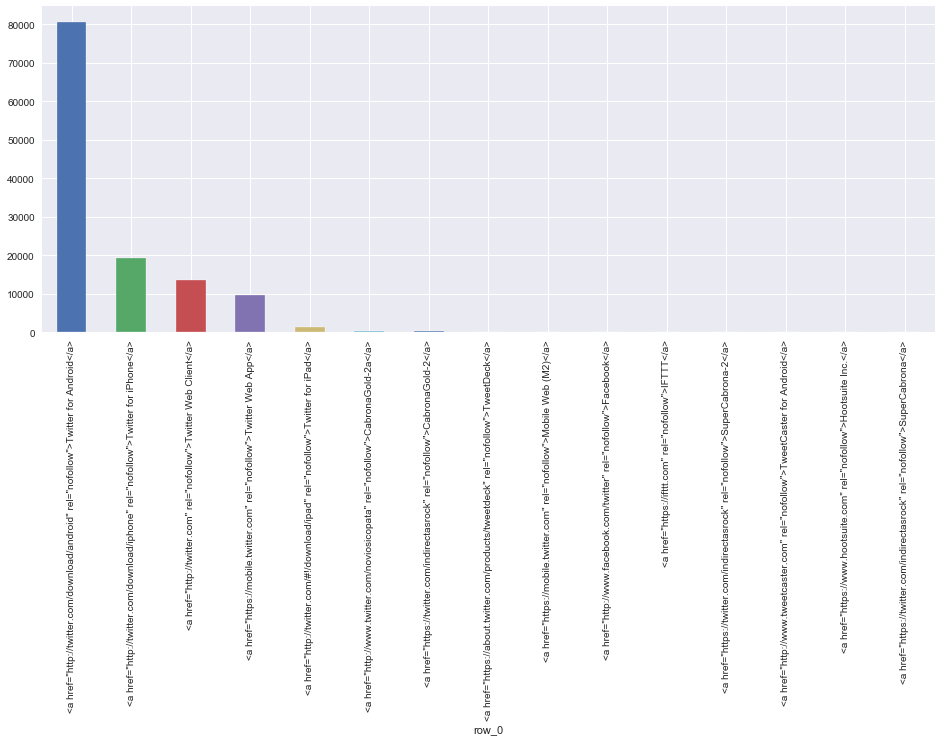

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


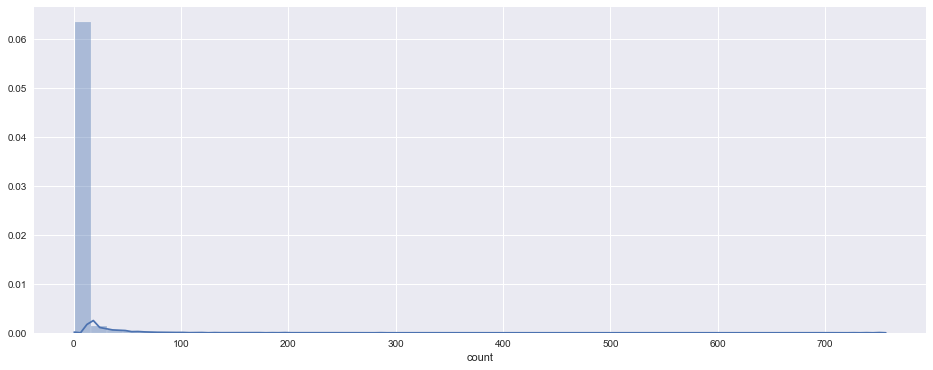

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    30927.000
mean         4.081
std         13.398
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        756.000
Name: count, dtype: float64

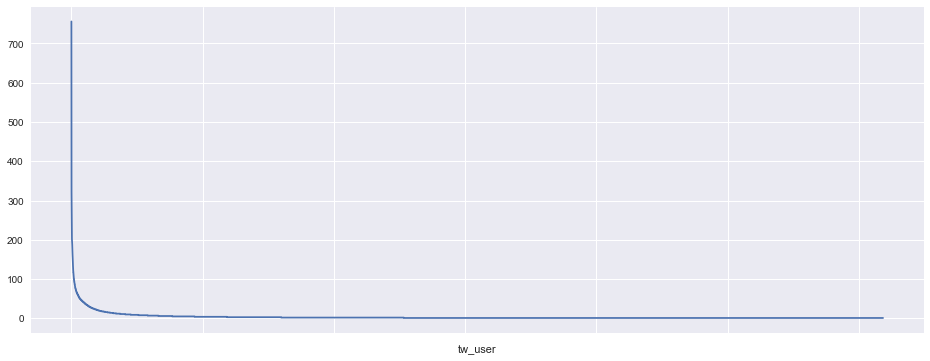

In [8]:
ids_freqs.plot(figsize=(16, 6))

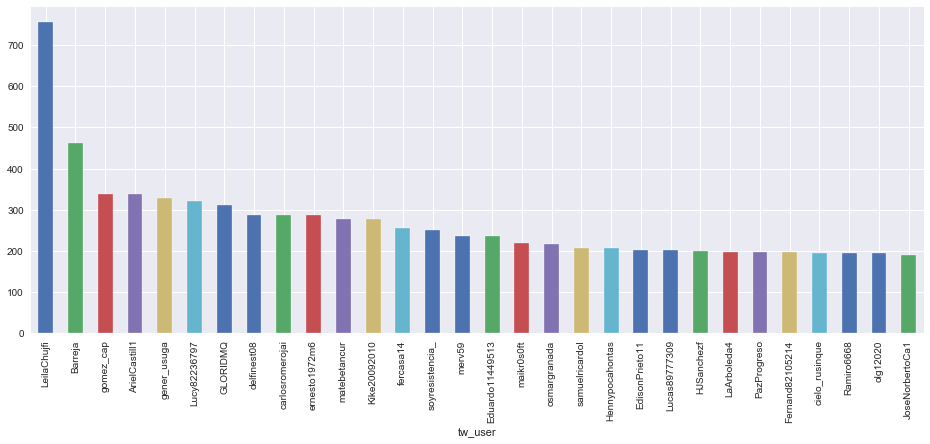

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
LeilaChujfi        756
Barreja            463
gomez_cap          337
ArielCastill1      337
gener_usuga        328
Lucy82236797       322
GLORIDMQ           311
delfinest08        288
carlosromerojai    286
ernesto1972m6      286
matebetancur       278
Kike20092010       277
fercasa14          256
soyresistencia_    251
merv59             237
Eduardo11449513    236
maikr0s0ft         220
osmargranada       217
samuelricardol     207
Hennypocahontas    207
EdisonPrieto11     202
Lucas89777309      201
HJSanchezf         199
LaArboleda4        198
Fernand82105214    197
PazProgreso        197
cielo_rusinque     195
Ramiro6668         194
olg12020           194
JoseNorbertoCa1    189
CarlosDuvanSal1    189
FabianSanabriaS    188
davamara16         185
Yarokamena         181
OctavioLopezSie    176
kalimann56         175
wilromerol         174
Fernand80369012    173
Hachecea1          172
AnakareriNannaE    167
akanesita01        166
NayibeOrdonez      165
henry_guarnizo     164
nic

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

4436

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 4446


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(126218, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

MafeCarrascal      7794
Marianiniecheve    6977
CathyJuvinao       5987
ClaudiaLopez       4277
VillegasPoljak     4163
cielo_rusinque     3464
angelamrobledo     2789
FabianSanabriaS    2720
Uriasv             2707
FiscaliaCol        2504
DanielSamperO      2226
gener_usuga        2201
AngelicaLozanoC    1975
GustavoBolivar     1761
petrogustavo       1527
ANNALVAREZG        1510
NoticiasUno        1486
JERobledo          1360
ginachef           1217
PoliciaColombia    1170
dtype: int64


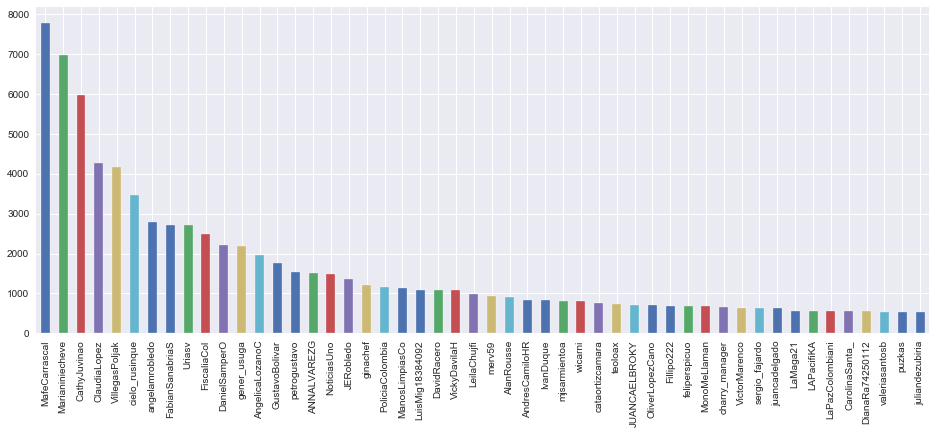

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

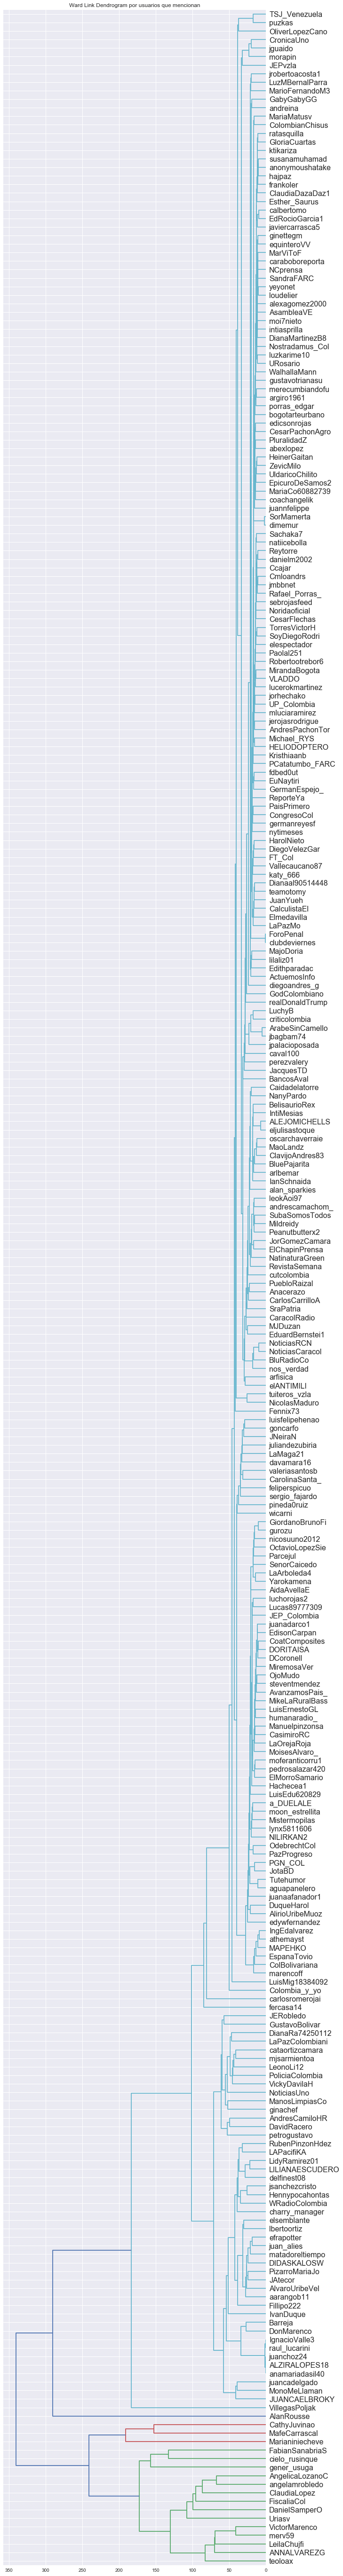

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        689.0
Barreja            491.0
merv59             388.0
GLORIDMQ           342.0
ernesto1972m6      299.0
gener_usuga        297.0
Lucy82236797       283.0
ArielCastill1      277.0
matebetancur       270.0
gomez_cap          266.0
Kike20092010       250.0
fercasa14          245.0
olg12020           231.0
Eduardo11449513    230.0
ANNALVAREZG        215.0
osmargranada       212.0
AnakareriNannaE    210.0
samuelricardol     209.0
FabianSanabriaS    207.0
Hennypocahontas    206.0
CarlosDuvanSal1    205.0
LaArboleda4        205.0
JoseNorbertoCa1    205.0
PazProgreso        204.0
Ramiro6668         200.0
HJSanchezf         198.0
OctavioLopezSie    194.0
Fernand80369012    194.0
cielo_rusinque     193.0
soyresistencia_    193.0
Lucas89777309      183.0
wilromerol         174.0
chinvila23         167.0
henry_guarnizo     167.0
maikr0s0ft         166.0
kalimann56         163.0
wicarni            159.0
MABG07194938       151.0
delfinest08        151.0
mjrmora            150.0


In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

MafeCarrascal      7794.0
Marianiniecheve    6977.0
CathyJuvinao       5987.0
ClaudiaLopez       4277.0
VillegasPoljak     4163.0
cielo_rusinque     3464.0
angelamrobledo     2789.0
FabianSanabriaS    2720.0
Uriasv             2707.0
FiscaliaCol        2504.0
DanielSamperO      2226.0
gener_usuga        2201.0
AngelicaLozanoC    1975.0
GustavoBolivar     1761.0
petrogustavo       1527.0
ANNALVAREZG        1510.0
NoticiasUno        1486.0
JERobledo          1360.0
ginachef           1217.0
PoliciaColombia    1170.0
ManosLimpiasCo     1142.0
LuisMig18384092    1095.0
DavidRacero        1095.0
VickyDavilaH       1076.0
LeilaChujfi         984.0
merv59              945.0
AlanRousse          922.0
AndresCamiloHR      832.0
IvanDuque           829.0
mjsarmientoa        820.0
wicarni             813.0
cataortizcamara     749.0
teoloax             741.0
JUANCAELBROKY       712.0
OliverLopezCano     705.0
Fillipo222          688.0
feliperspicuo       680.0
MonoMeLlaman        678.0
charry_manag

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

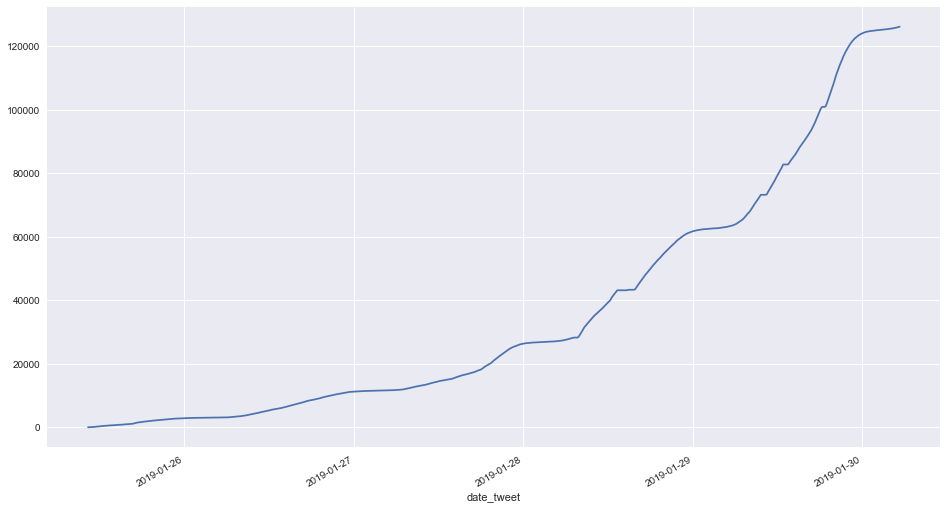

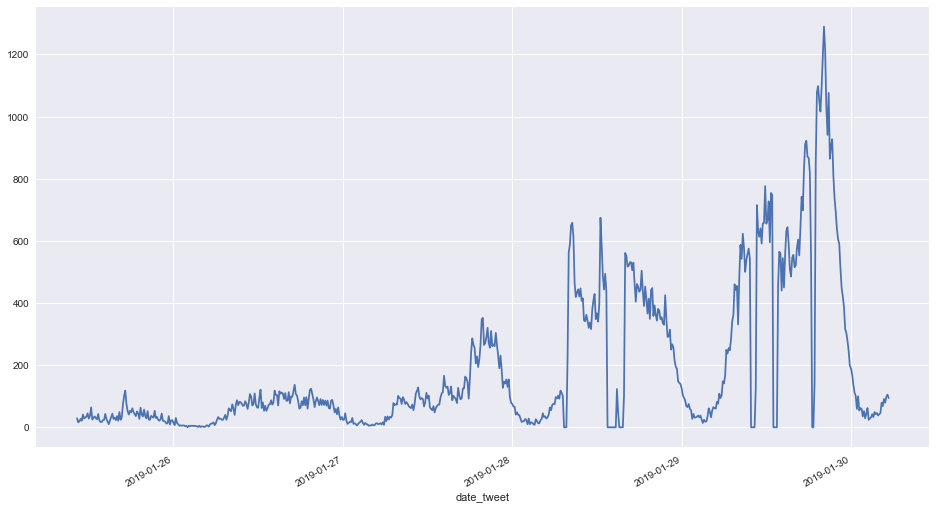

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
LeilaChujfi      756
Barreja          463
gomez_cap        337
ArielCastill1    337
gener_usuga      328
Lucy82236797     322
GLORIDMQ         311
ernesto1972m6    286
matebetancur     278
merv59           237
dtype: int64

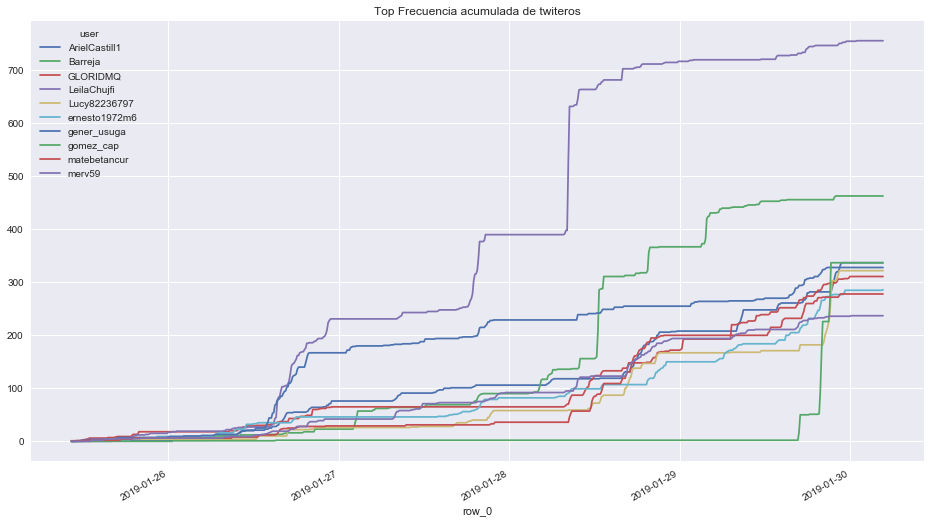

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

MafeCarrascal      7794
Marianiniecheve    6977
CathyJuvinao       5987
ClaudiaLopez       4277
VillegasPoljak     4163
cielo_rusinque     3464
angelamrobledo     2789
FabianSanabriaS    2720
Uriasv             2707
FiscaliaCol        2504
dtype: int64

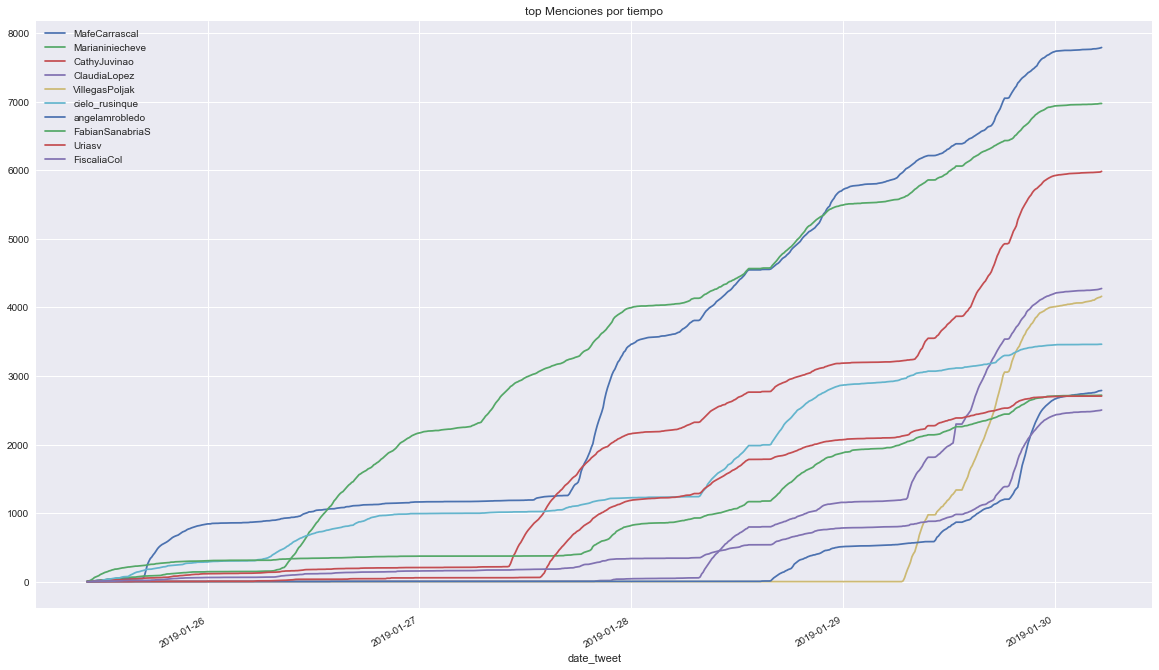

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

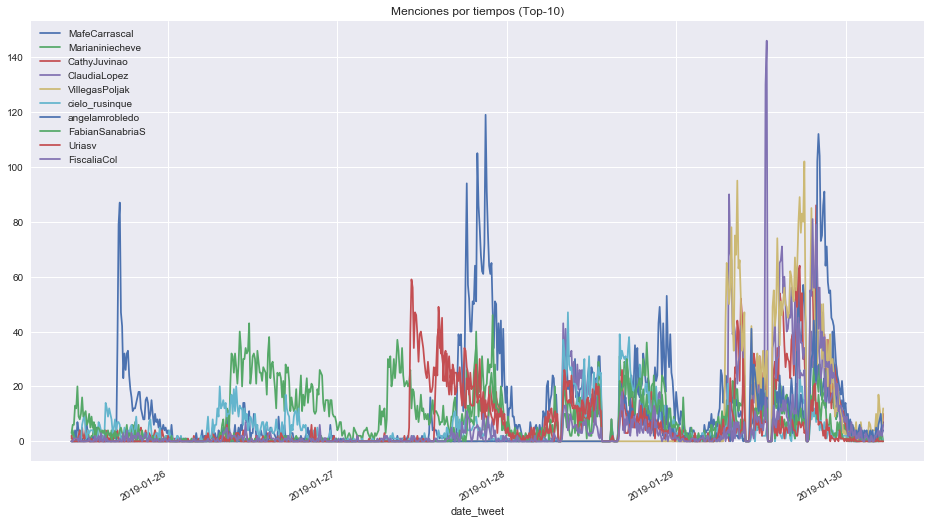

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [71]:
mat_size=40
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,MafeCarrascal,Marianiniecheve,CathyJuvinao,ClaudiaLopez,VillegasPoljak,cielo_rusinque,angelamrobledo,FabianSanabriaS,Uriasv,FiscaliaCol,...,wicarni,cataortizcamara,teoloax,JUANCAELBROKY,OliverLopezCano,Fillipo222,feliperspicuo,MonoMeLlaman,charry_manager,VictorMarenco
LeilaChujfi,9.0,19.0,3.0,0.0,0.0,50.0,5.0,13.0,7.0,10.0,...,3.0,1.0,14.0,6.0,0.0,5.0,0.0,10.0,4.0,17.0
Barreja,4.0,14.0,0.0,1.0,0.0,18.0,2.0,18.0,7.0,6.0,...,0.0,1.0,10.0,5.0,0.0,0.0,0.0,5.0,7.0,14.0
merv59,3.0,24.0,1.0,1.0,0.0,22.0,0.0,5.0,2.0,2.0,...,0.0,0.0,11.0,3.0,0.0,0.0,0.0,2.0,0.0,29.0
GLORIDMQ,7.0,16.0,4.0,2.0,0.0,32.0,4.0,10.0,4.0,4.0,...,1.0,2.0,4.0,6.0,0.0,5.0,0.0,5.0,4.0,4.0
ernesto1972m6,13.0,26.0,9.0,4.0,0.0,11.0,1.0,2.0,2.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,2.0,5.0


In [72]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

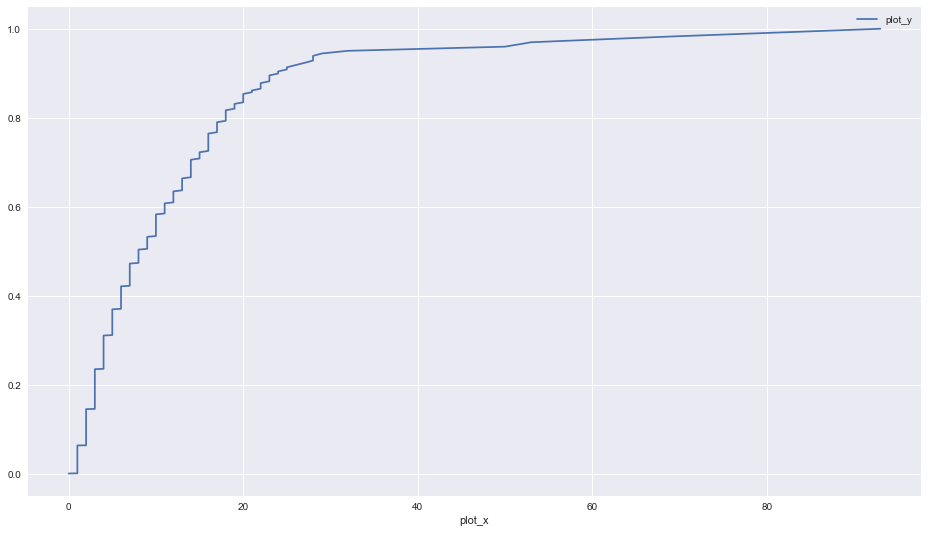

In [73]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [78]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

6.0
273


,tw_de,tw_para,freq
445,gener_usuga,gener_usuga,93.0
298,FabianSanabriaS,FabianSanabriaS,69.0
960,LeilaChujfi,LeilaChujfi,53.0
200,LeilaChujfi,cielo_rusinque,50.0
203,GLORIDMQ,cielo_rusinque,32.0
1562,merv59,VictorMarenco,29.0
228,cielo_rusinque,cielo_rusinque,28.0
46,Lucy82236797,Marianiniecheve,28.0
448,matebetancur,gener_usuga,28.0
962,merv59,LeilaChujfi,27.0


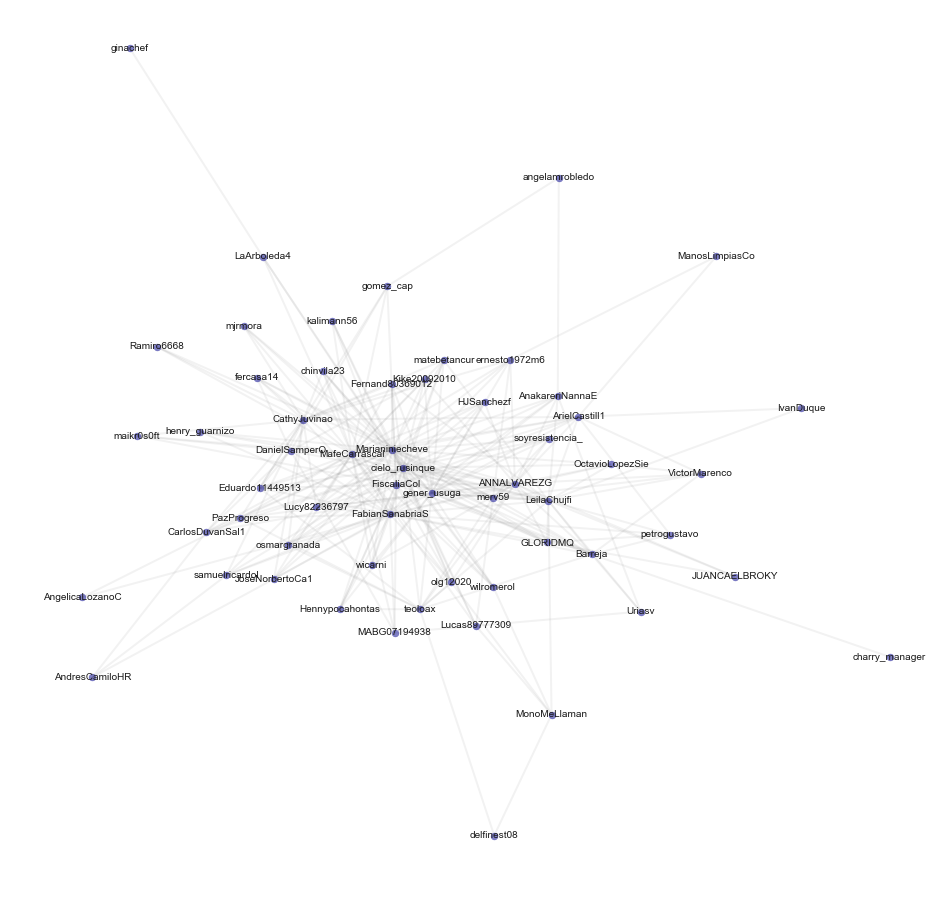

In [79]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

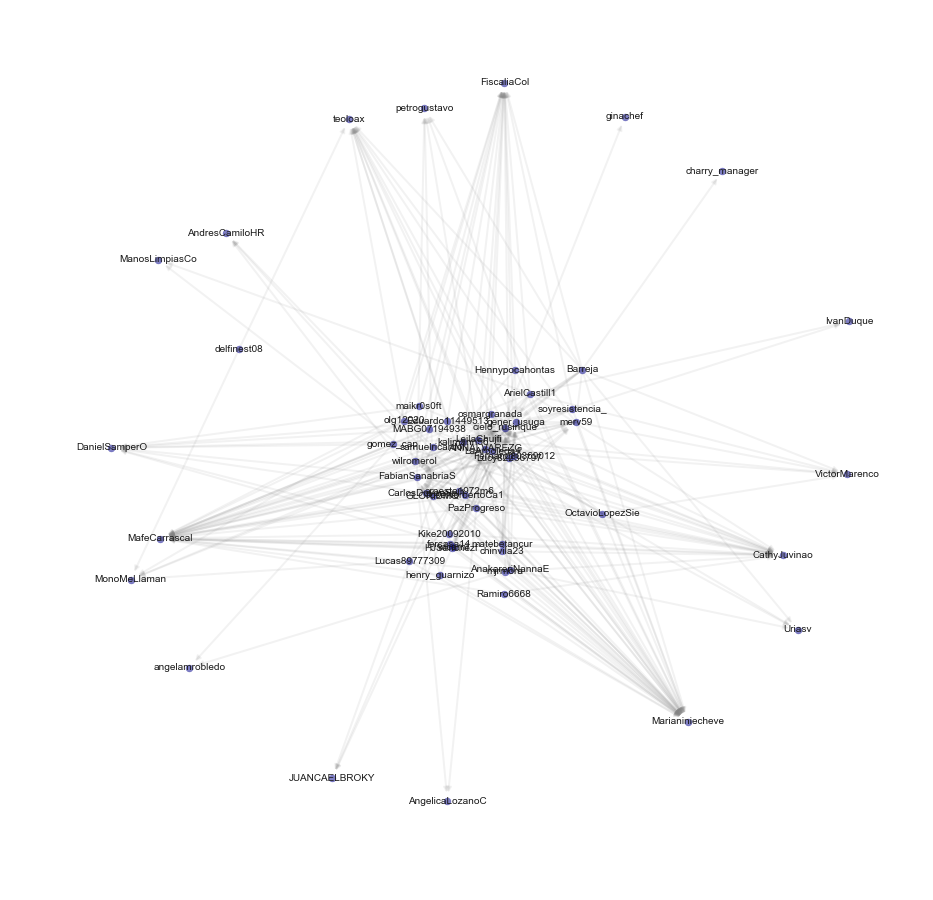

In [80]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

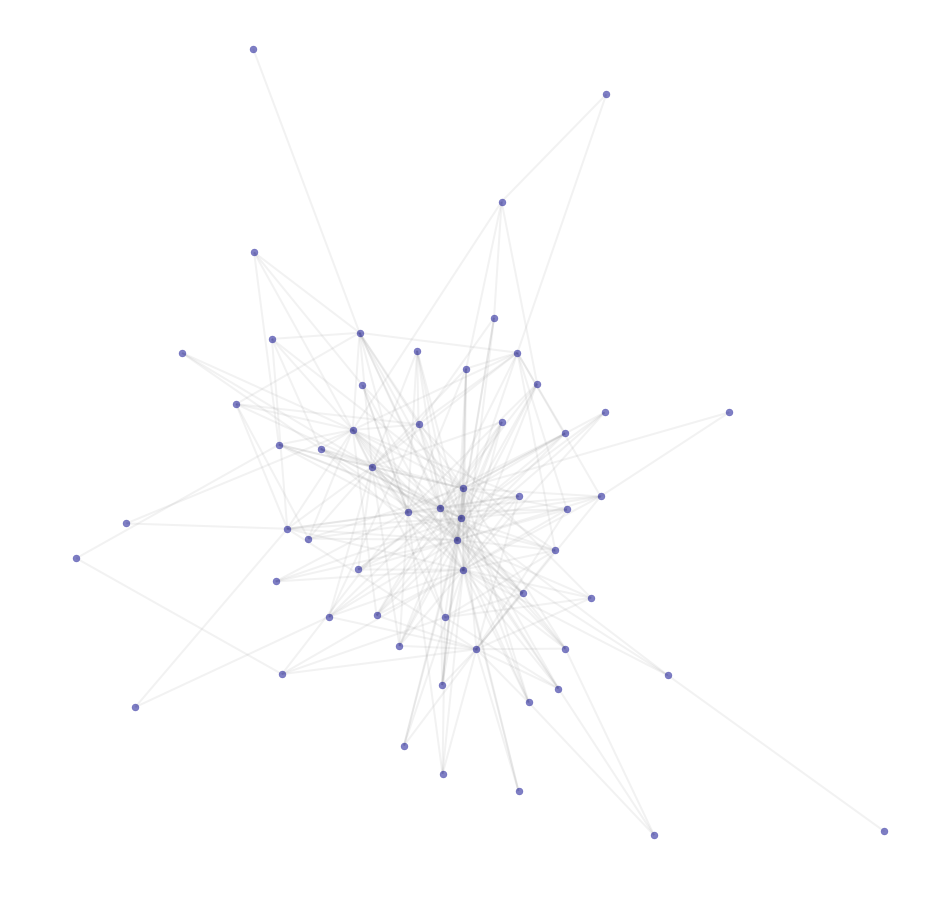

In [81]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()